In [18]:
import numpy as np
from os import listdir
import matplotlib.pyplot as plt
from signals import *
from plots import *
from samplers import *
from pylab import rcParams
rcParams['figure.figsize'] = 5, 2.5

In [19]:
def generate_plots(n, ovs, noise_scale, true_param, cut=0):
    version = str(n) + "_" + str(ovs) + "_" + str(noise_scale)
    
    errors = np.load('offline_results/offline_errors'+version+'.npy')
    betas = np.load('offline_results/offline_beta'+version+'.npy')
    parameters = np.load('offline_results/offline_params'+version+'.npy')
    
    errors = np.degrees(errors[cut:])
    betas = betas[cut:]
    parameters = np.degrees(parameters[cut:])
    
    fig1, ax0 = plt.subplots()
    ax0.loglog(errors, 'r-')
    ax0.set_xlabel('iteration')
    ax0.set_ylabel('erors', color='r')
    ax0.tick_params('y', colors='r')
    
    ax1 = ax0.twinx()
    ax1.axhline(true_param)
    ax1.semilogx(parameters, 'c-')
    ax1.set_ylabel('parameters', color='c')
    ax1.tick_params('y', colors='c')

    fig1.tight_layout()
    
    fig2, ax2 = plt.subplots()
    ax2.loglog(errors, 'r-')
    ax2.set_xlabel('iteration')
    ax2.set_ylabel('erors', color='r')
    ax2.tick_params('y', colors='r')

    ax3 = ax2.twinx()
    ax3.loglog(np.abs(parameters-true_param), 'g-')
    ax3.set_ylabel('true error', color='g')
    ax3.tick_params('y', colors='g')

    fig2.tight_layout()
    return fig1, fig2

In [20]:
# listdir("offline_results/")

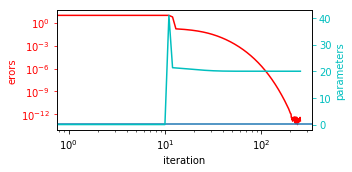

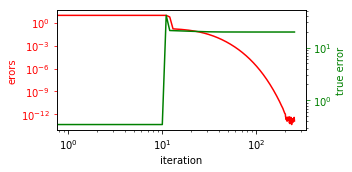

In [21]:
param = np.pi/18
generate_plots(5, 1, 0, 2*param)
plt.show()

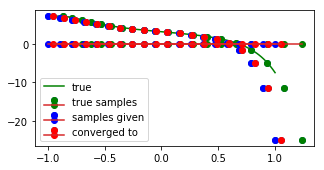

In [28]:
p = np.array([1.000000000000000000e+00,-2.825421682312351468e+00,-2.022133420929154990e-01,-1.483193386636804334e+00,-2.063111012904942587e+00,5.638963672080870015e-01,-3.154727063937948994e+00,1.396869864645395032e-01,-2.631363077020359764e+00,3.202233789725539292e+00])       
# p = np.array([1.000000000000000000e+00,-6.572142940668219968e-02,3.695792029051552241e+00,2.886283359860007280e+00,1.849571321175254024e+00])

pol = SecondSurfacePolynomial(p)
t = np.linspace(-1,1, 100)
plt.plot(t, pol.get_samples(t), 'g', label="true")
sampler = SurfaceSampler(pol, 2*len(p), [param, 1, 1], interval_length=2, sigma=0.0, beg=-1)
plt.stem(pol.shifted_positions(sampler.sample_positions,[param, 1, 1]), sampler.sample_values, 'go', label="true samples")
plt.stem(sampler.sample_positions, sampler.sample_values, 'bo', label="samples given")
plt.stem(pol.shifted_positions(sampler.sample_positions,[0.05, 1, 1]), sampler.sample_values, 'ro', label="converged to")
plt.legend(loc=3)
plt.show()

In [29]:
def known_error(start_positions,  model_size, tr_param, samples):
    x = SecondSurfacePolynomial.create_ls_matrix(start_positions, model_size, tr_param)
    parameter_estimate = np.linalg.solve(np.dot(x.T, x), np.dot(x.T, samples))
    return np.linalg.norm(np.dot(x, parameter_estimate) - samples)

20


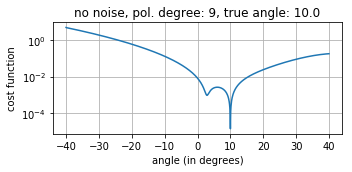

In [32]:
err1 = []
values = sampler.sample_values + 1e-2*np.random.randn(len(sampler.sample_values))
print(len(values))
angles = np.linspace(-np.pi/4.5, np.pi/4.5, 900)
for a in angles:
    err1.append(known_error(sampler.sample_positions, len(p), [a, 1, 1], values))

err = []
values = sampler.sample_values
angles = np.linspace(-np.pi/4.5, np.pi/4.5, 900)
for a in angles:
    err.append(known_error(sampler.sample_positions, len(p), [a, 1, 1], values))
    
fig = plt.figure()
plt.semilogy(np.degrees(angles), err)
# plt.semilogy(np.degrees(angles), err1)
plt.xlabel("angle (in degrees)")
plt.ylabel("cost function")
plt.title("no noise, pol. degree: 9, true angle: "+str(np.degrees(param)))
plt.grid()
plt.tight_layout()
plt.show()
fig.savefig("non_convex.pdf")

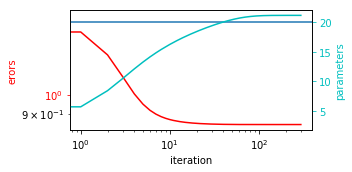

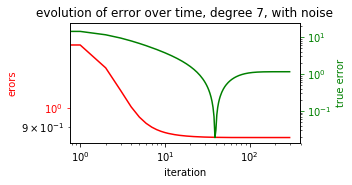

In [25]:
f1, f2 = generate_plots(7, 1, 1, np.degrees(2*param))
plt.title("evolution of error over time, degree 7, with noise")
f1.savefig("pol_iter_params.pdf")
f2.savefig("pol_iter_erros.pdf")
plt.show()

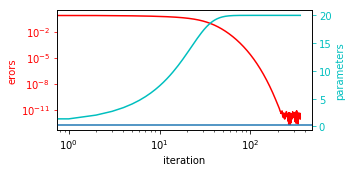

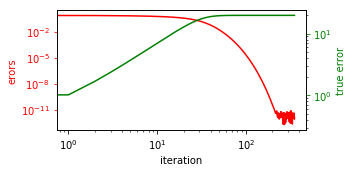

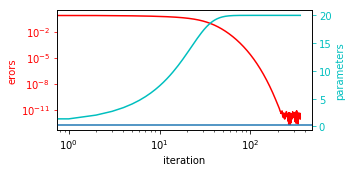

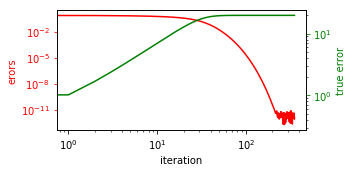

In [27]:
generate_plots(7, 1, 0, 2*param)
plt.show()